IMPORTING THE LIBRARIES

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


LOADING THE DATASET

In [39]:
df_trades = pd.read_csv("historical_data.csv")
df_sentiment = pd.read_csv("fear_greed_index.csv")


DATA CLEANING AND PROCESSING





1. CLEANING COLUMNS NAMES




In [40]:
df_trades.columns = df_trades.columns.str.strip().str.replace(" ", "_")




2. CONVERTING TIMESTAMPS



In [41]:
df_trades["Timestamp_IST"] = pd.to_datetime(df_trades["Timestamp_IST"],
                                            format="%d-%m-%Y %H:%M")

df_trades["Date"] = df_trades["Timestamp_IST"].dt.date




3. CONVERTING SENTIMENT DATES




In [42]:
df_sentiment["date"] = pd.to_datetime(df_sentiment["date"],
                                      format="mixed",
                                      dayfirst=True)

df_sentiment["Date"] = df_sentiment["date"].dt.date


4. FIXING MISSING VALUES OF SENTIMENT

In [43]:
df_sentiment = df_sentiment.sort_values("Date")
df_sentiment["value"] = df_sentiment["value"].ffill()
df_sentiment["classification"] = df_sentiment["classification"].ffill()


MERGING TRADE DATA WITH MARKET SENTIMENT

In [44]:
df_merged = df_trades.merge(
    df_sentiment[["Date", "value", "classification"]],
    on="Date",
    how="left"
)


EDA

1. SENTIMENT DISTRIBUTION

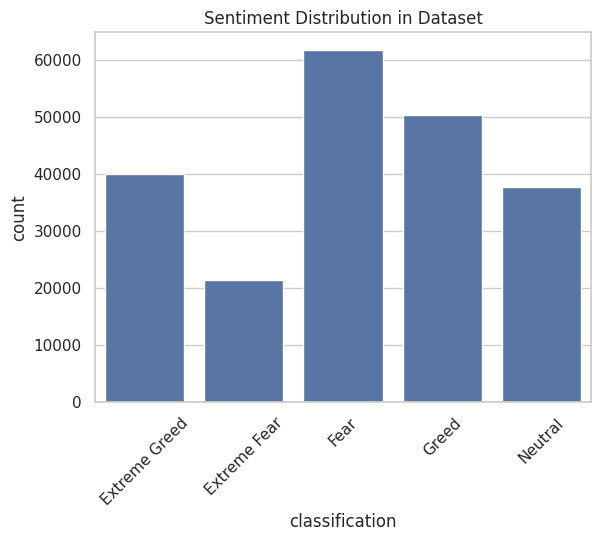

In [45]:
sns.countplot(data=df_merged, x="classification")
plt.title("Sentiment Distribution in Dataset")
plt.xticks(rotation=45)
plt.show()


2. PROFITABILITY VS SENTIMENT

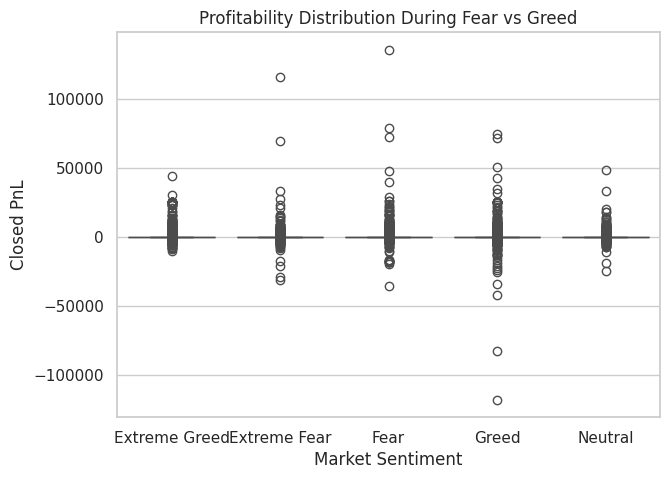

,mean,median,sum,count
classification,,,,
Extreme Fear,34.537862,0.0,7.391102e+05,21400
Extreme Greed,67.892861,0.0,2.715171e+06,39992
Fear,54.290400,0.0,3.357155e+06,61837
Greed,42.743559,0.0,2.150129e+06,50303
Neutral,34.307718,0.0,1.292921e+06,37686


In [46]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df_merged, x="classification", y="Closed_PnL")
plt.title("Profitability Distribution During Fear vs Greed")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.show()

profit_stats = df_merged.groupby("classification")["Closed_PnL"].agg(['mean','median','sum','count'])
profit_stats


3. USD VS SENTIMENT

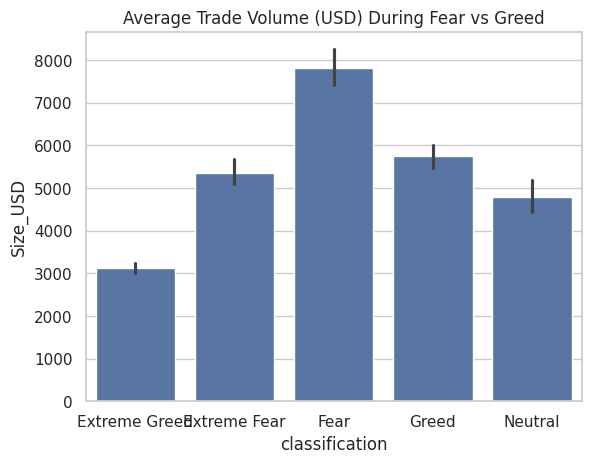

In [47]:
sns.barplot(x="classification", y="Size_USD", data=df_merged)
plt.title("Average Trade Volume (USD) During Fear vs Greed")
plt.show()


4. POSITION SIZE VS SENTIMENT

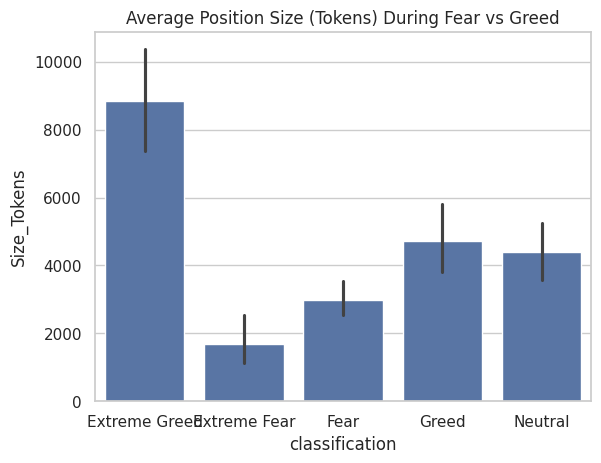

In [48]:
sns.barplot(x="classification", y="Size_Tokens", data=df_merged)
plt.title("Average Position Size (Tokens) During Fear vs Greed")
plt.show()


5. BUY VS SELL

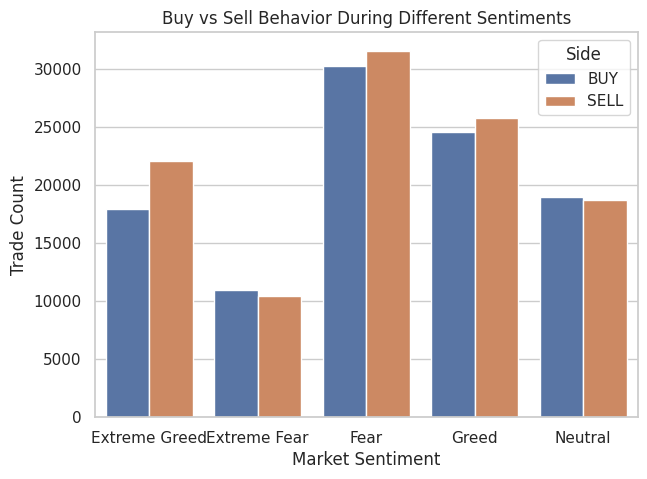

In [49]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_merged, x="classification", hue="Side")
plt.title("Buy vs Sell Behavior During Different Sentiments")
plt.xlabel("Market Sentiment")
plt.ylabel("Trade Count")
plt.show()


EXECUTION PRICE VS SENTIMENT

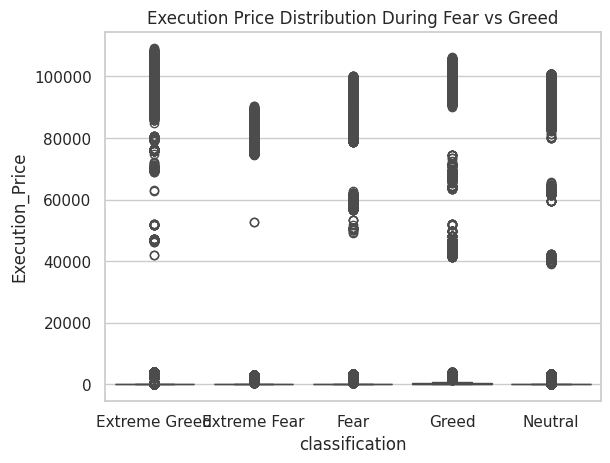

In [50]:
sns.boxplot(x="classification", y="Execution_Price", data=df_merged)
plt.title("Execution Price Distribution During Fear vs Greed")
plt.show()


SAVING MERGE CLEANED DATA

In [52]:
df_merged.to_csv("merged_cleaned_data.csv", index=False)
